In [1]:
import os
import math
import fiftyone as fo
import fiftyone.brain as fob
from fiftyone import ViewField as F
from typing import Any, Dict, List, Optional, Tuple

In [2]:
fo.list_datasets()

['Deduped dataset - automatic',
 'Deduped dataset - automatic1',
 'Documents Dataset',
 'Documents Dataset - Cleaned']

In [3]:
dataset = fo.load_dataset("Documents Dataset")

In [ ]:
# compute
dataset.compute_metadata()


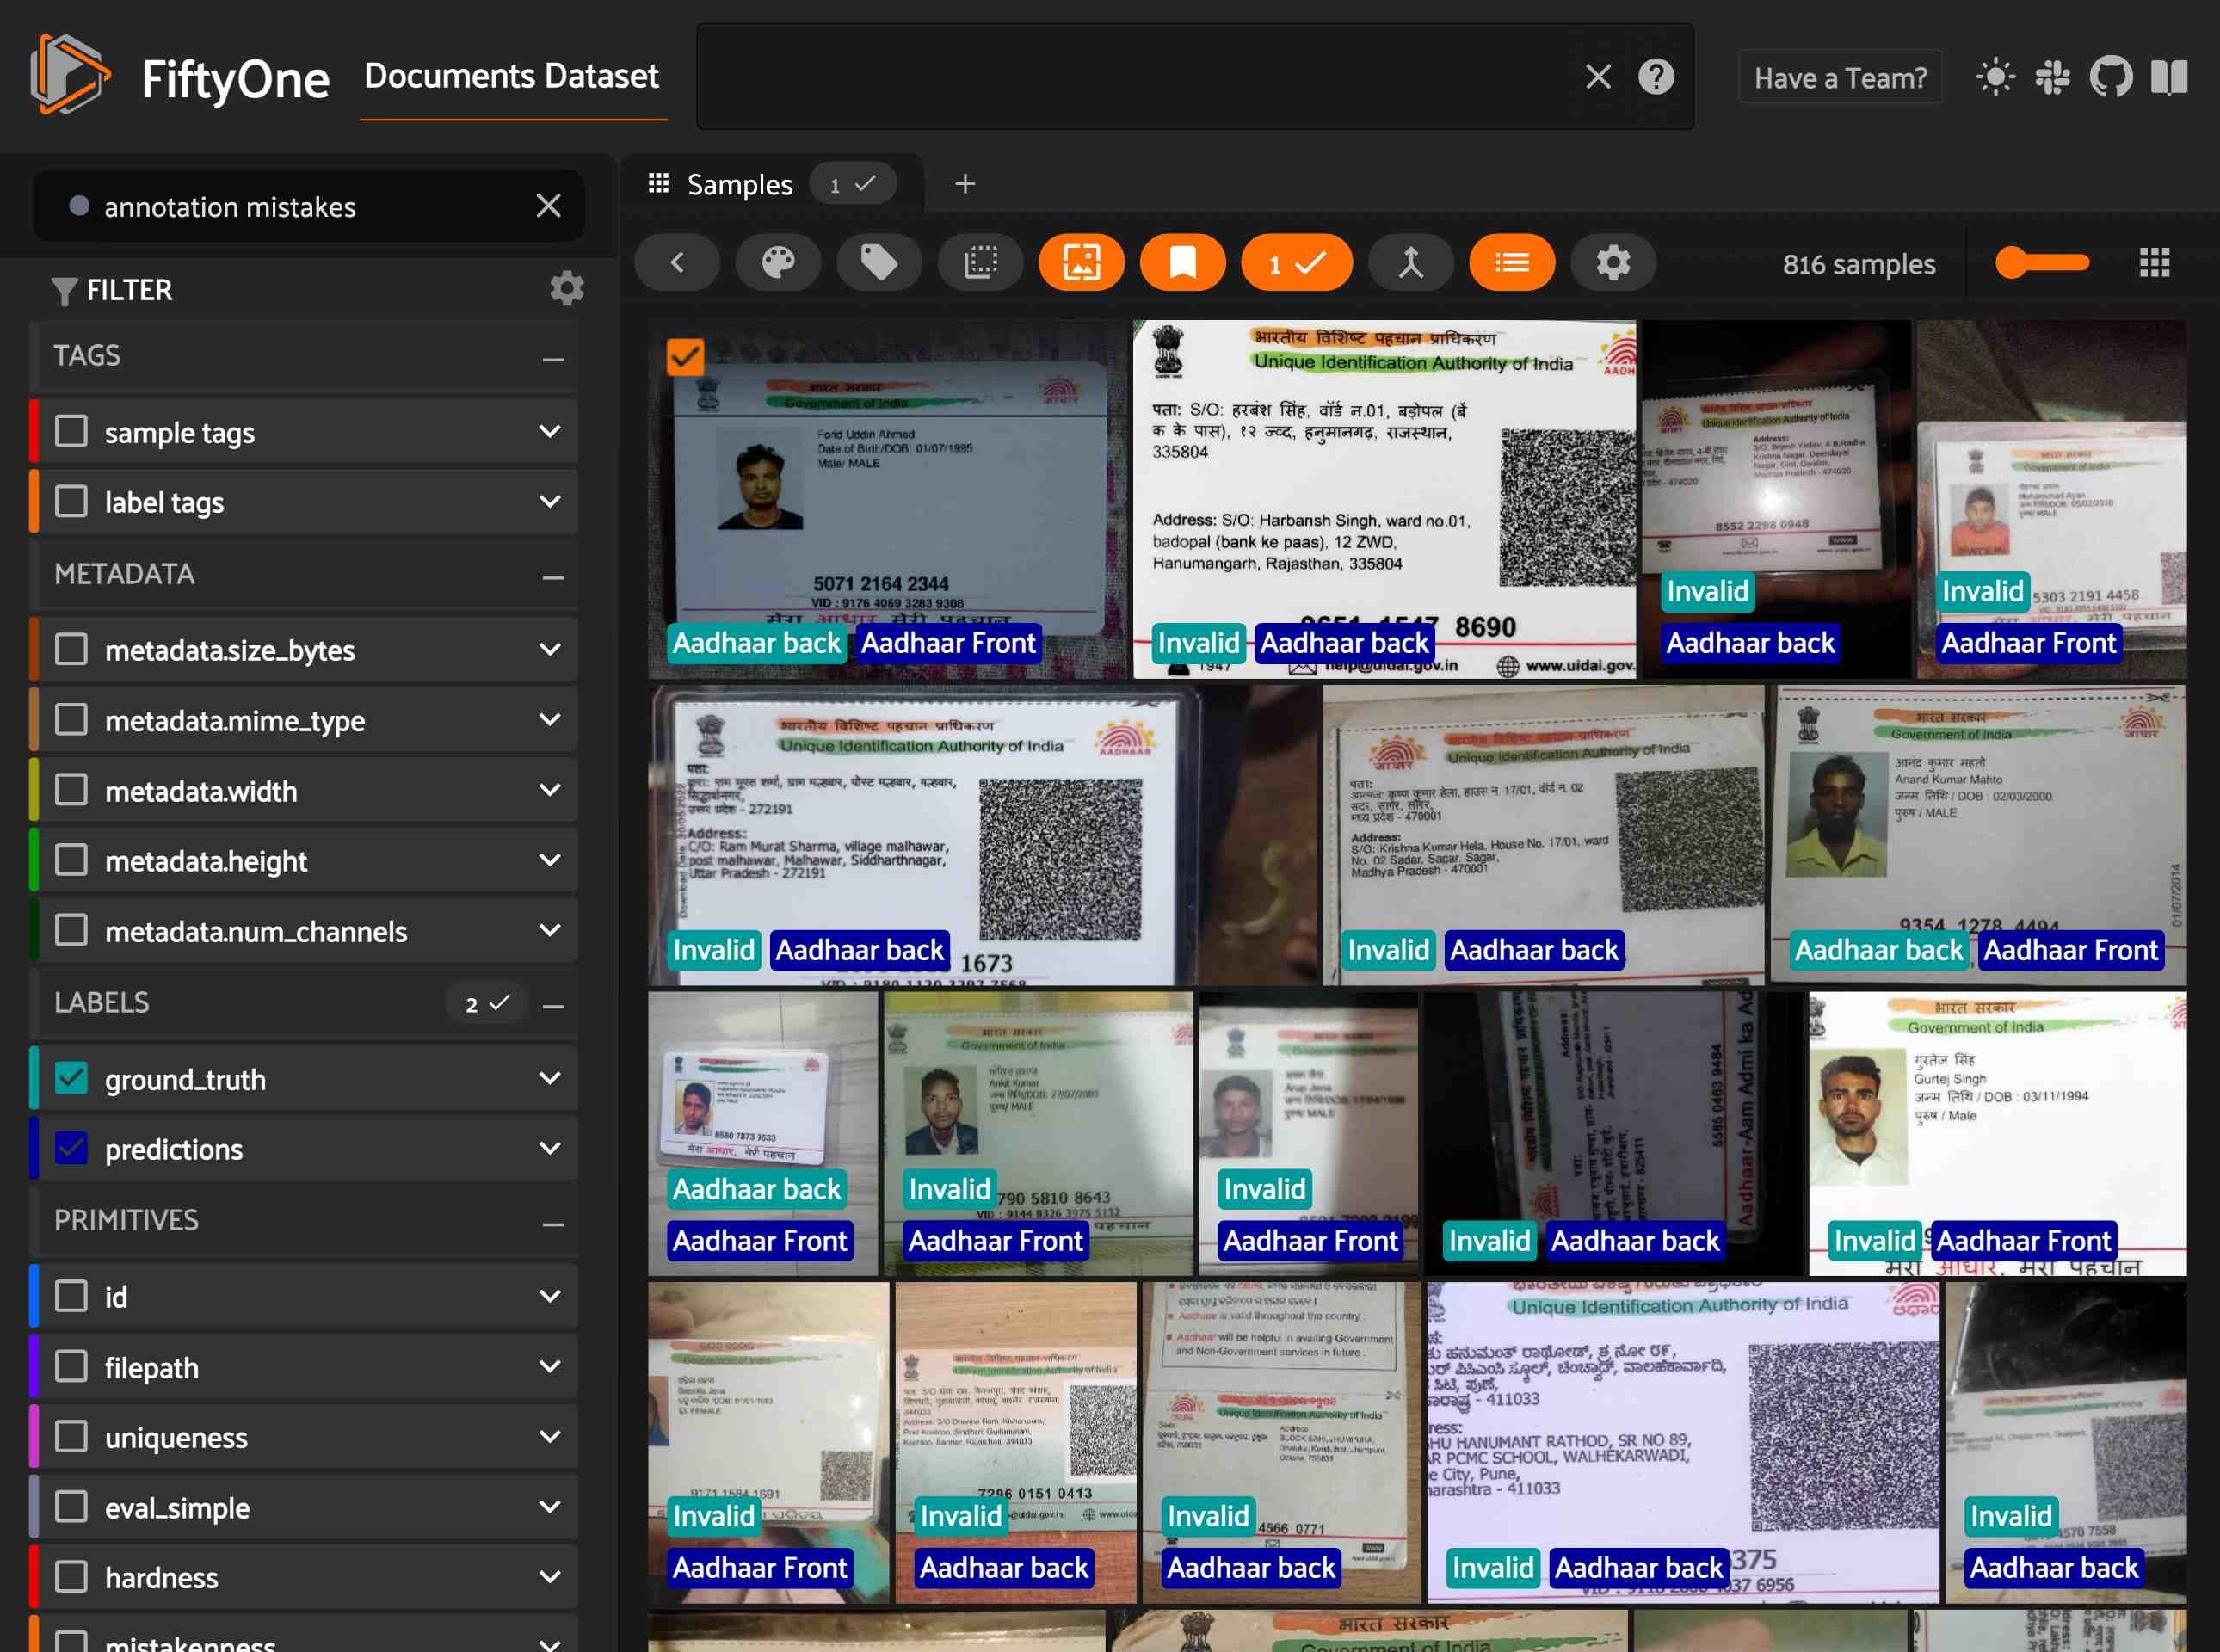

In [4]:
session = fo.launch_app(dataset)

## Duplicates view

Computing embeddings...
 100% |█████████████████| 206/206 [5.3s elapsed, 0s remaining, 41.8 samples/s]      
Computing uniqueness...
Uniqueness computation complete



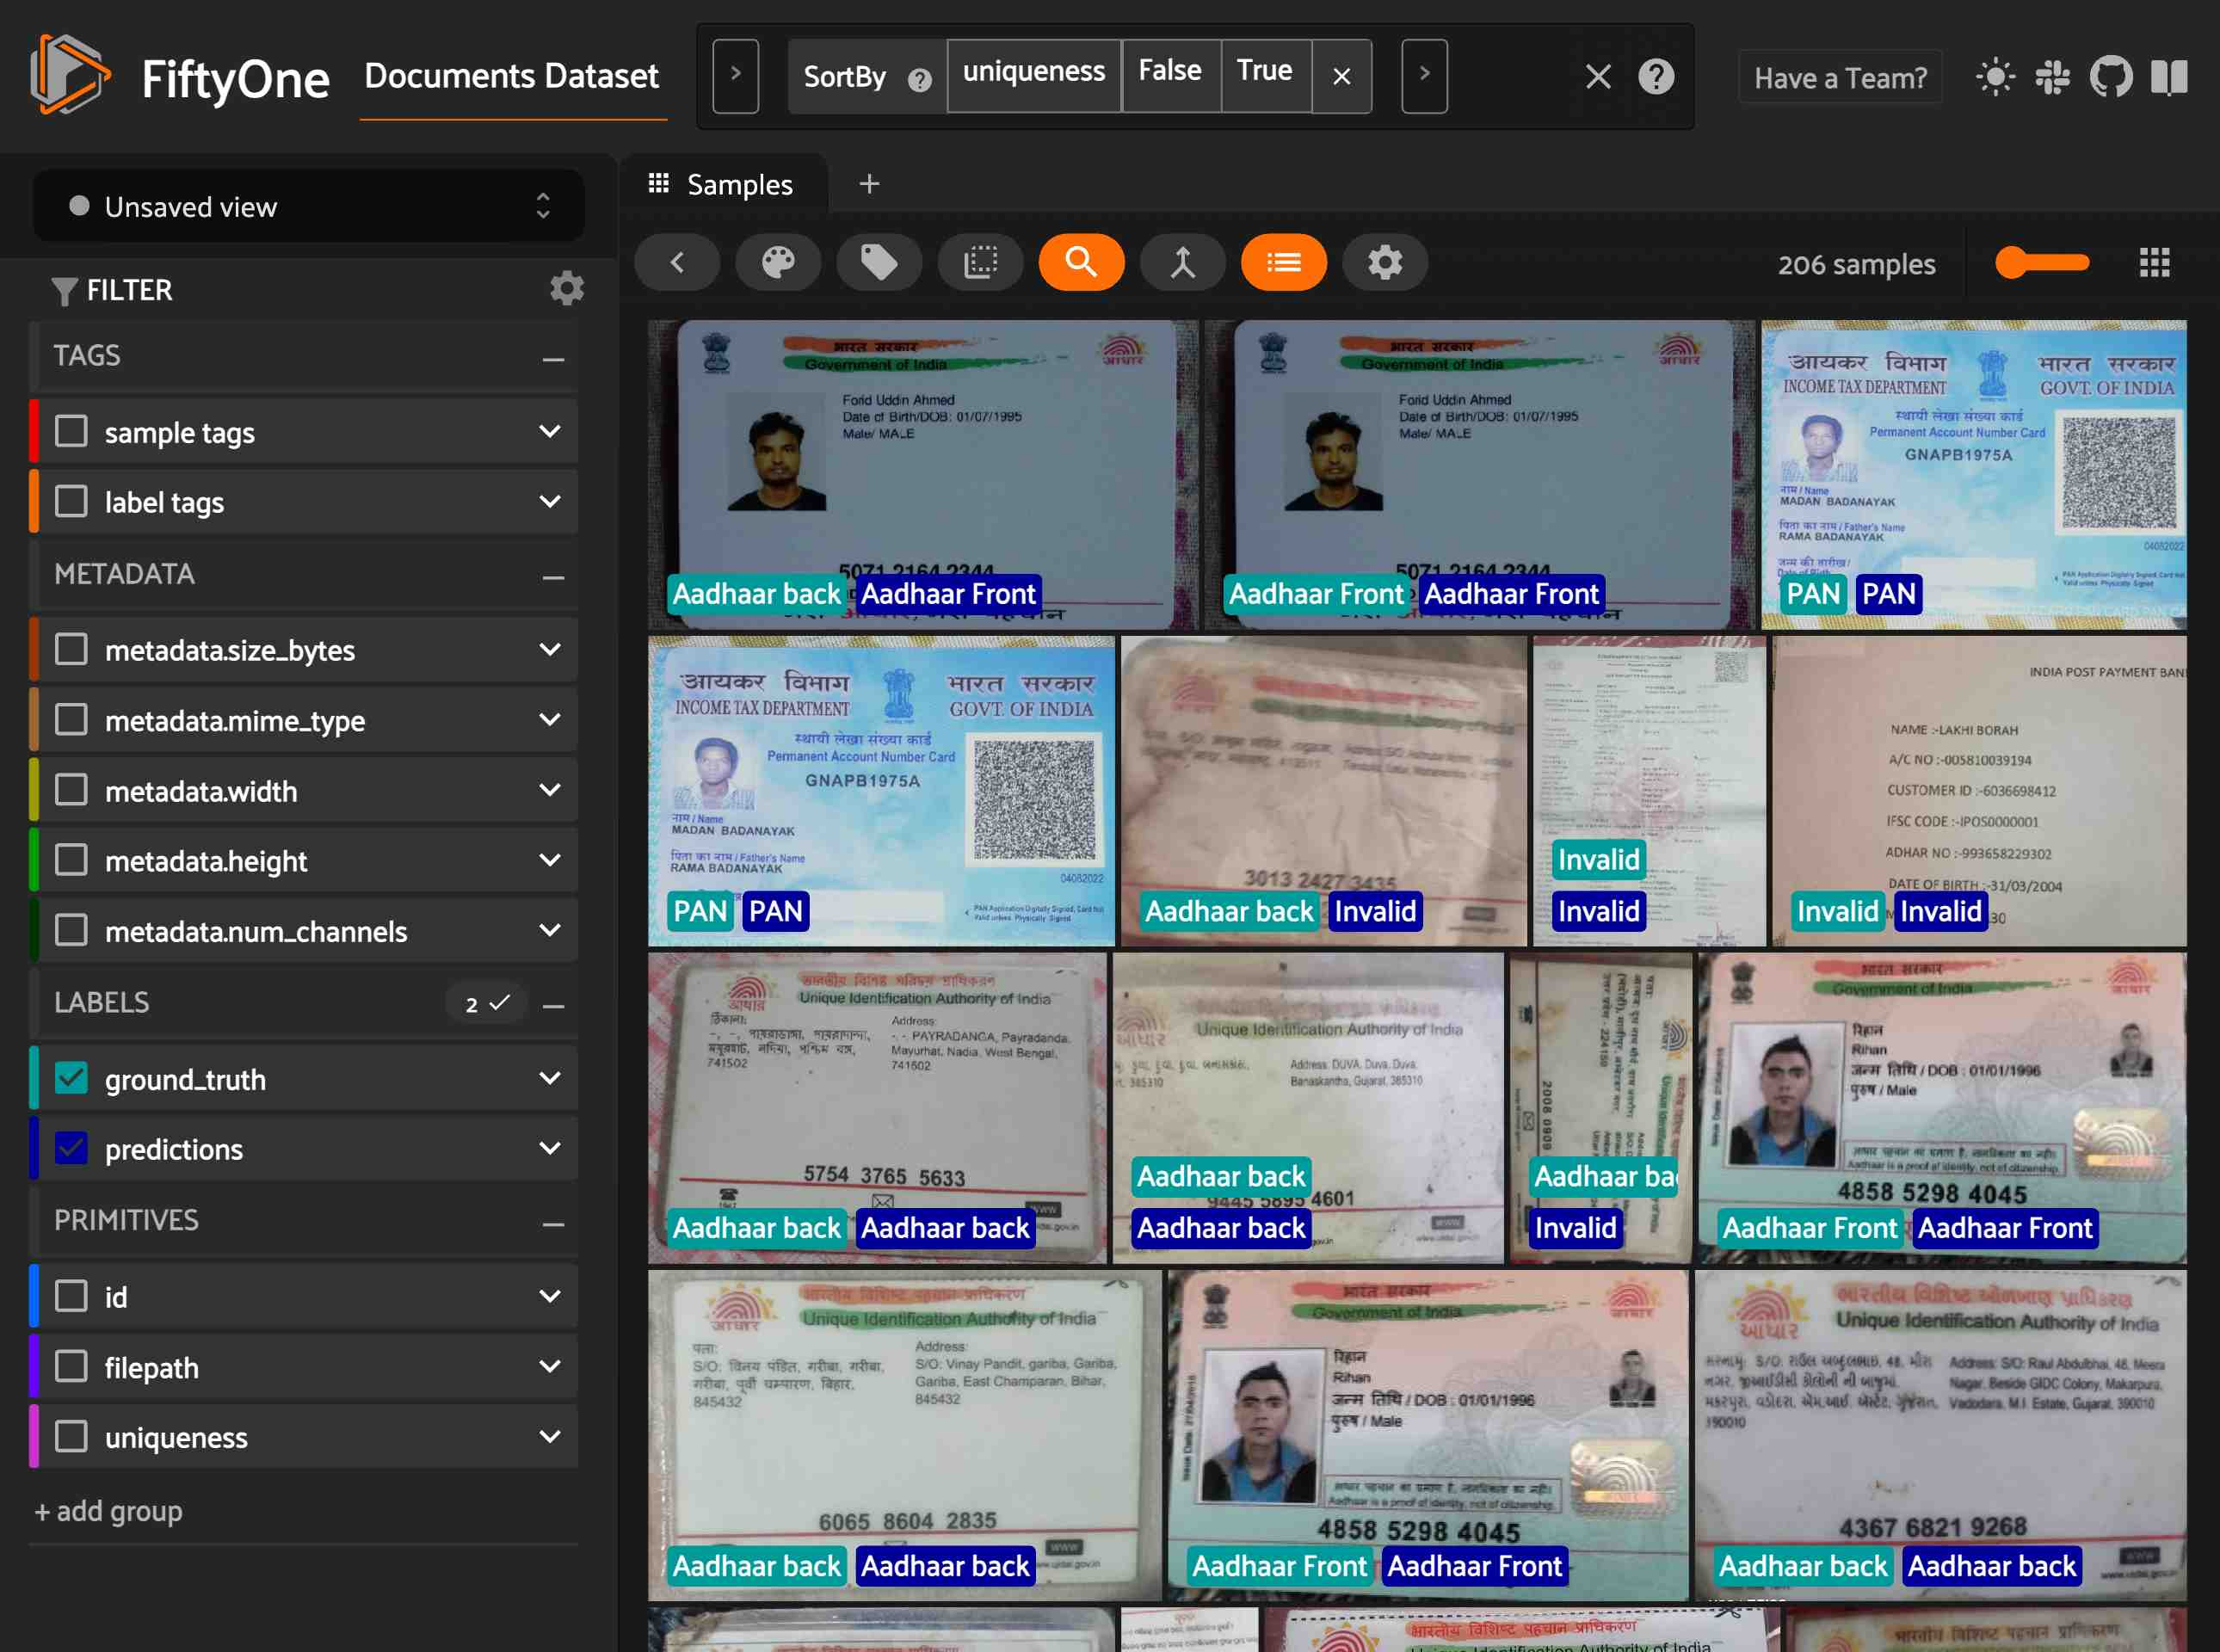

In [29]:
fob.compute_uniqueness(dataset)
# Sort in increasing order of uniqueness (least unique first)
dups_view = dataset.sort_by("uniqueness")
# Open view in the App
session.view = dups_view

## Metrics

### Val

In [30]:
# Evaluate the predictions in the `predictions` field with respect to the
# labels in the `ground_truth` field
results_val = dataset.match_tags("val").evaluate_classifications(
    "predictions",
    gt_field="ground_truth",
    eval_key="eval_simple"
)

In [31]:
results_val.print_report()

               precision    recall  f1-score   support

Aadhaar Front       0.89      0.87      0.88        94
 Aadhaar back       0.88      0.94      0.91        71
      Invalid       0.62      0.56      0.59        32
          PAN       0.89      0.89      0.89         9

     accuracy                           0.85       206
    macro avg       0.82      0.82      0.82       206
 weighted avg       0.85      0.85      0.85       206



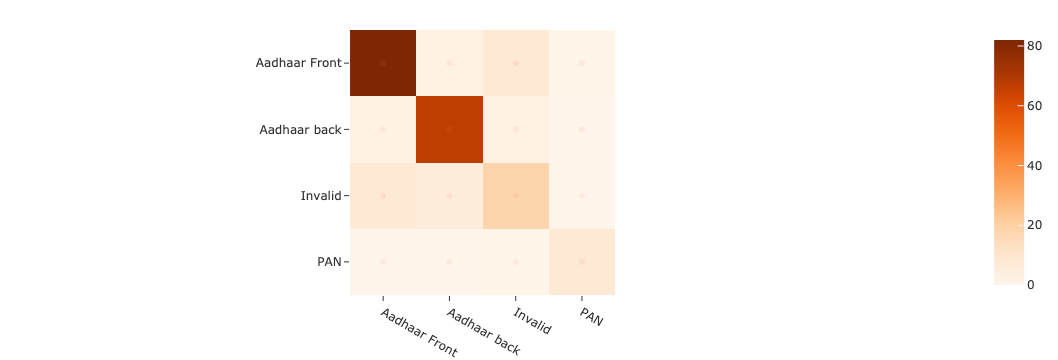

FigureWidget({
    'data': [{'mode': 'markers',
              'opacity': 0.1,
              'type': 'scatter',
              'uid': 'f4d26014-896d-48d6-8f16-33434372af11',
              'x': array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]),
              'y': array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])},
             {'colorscale': [[0.0, 'rgb(255,245,235)'], [0.125,
                             'rgb(254,230,206)'], [0.25, 'rgb(253,208,162)'],
                             [0.375, 'rgb(253,174,107)'], [0.5, 'rgb(253,141,60)'],
                             [0.625, 'rgb(241,105,19)'], [0.75, 'rgb(217,72,1)'],
                             [0.875, 'rgb(166,54,3)'], [1.0, 'rgb(127,39,4)']],
              'hoverinfo': 'skip',
              'showscale': False,
              'type': 'heatmap',
              'uid': '63d8af9e-6ddd-4385-8be1-b920acb6766b',
              'z': array([[ 0,  0,  1,  8],
                          [ 8,  6, 18,  0],
                          [ 2, 67,  

No such comm: 42edb900a12249b7b7534534914339c2


In [32]:
# Plot a confusion matrix
plot = results_val.plot_confusion_matrix()
plot.show()

In [33]:
plot.freeze()  # replaces interactive plot with static image

In [4]:
# Show most unique INCORRECT predictions on val split
session.view = (
    dataset
    .match_tags("val")
    .match(F("predictions.label") != F("ground_truth.label"))
    .sort_by("uniqueness", reverse=True)
)


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds



## Hardness

In [35]:
fob.compute_hardness(dataset, "predictions")

Computing hardness...
 100% |█████████████████| 206/206 [403.0ms elapsed, 0s remaining, 511.2 samples/s]      
Hardness computation complete


In [5]:
# Show the HARDEST FALSE POSITIVES on val split
session.view = (
    dataset
    .match_tags("val")
    .sort_by("hardness", reverse=True)
)


Could not connect session, trying again in 10 seconds



In [5]:
dataset.first()

<Sample: {
    'id': '653b93a77da98f61d75eeff4',
    'media_type': 'image',
    'filepath': '/Users/manan.tushar/Desktop/Projects/Id_classification/data/val/Aadhaar Front/PVC front_1696311246213471015_front_image.jpg',
    'tags': ['val'],
    'metadata': <ImageMetadata: {
        'size_bytes': 114750,
        'mime_type': 'image/jpeg',
        'width': 1488,
        'height': 967,
        'num_channels': 3,
    }>,
    'ground_truth': <Classification: {
        'id': '653b93a77da98f61d75eeff2',
        'tags': [],
        'label': 'Aadhaar Front',
        'confidence': None,
        'logits': None,
    }>,
    'predictions': <Classification: {
        'id': '653b93a77da98f61d75eeff3',
        'tags': [],
        'label': 'Aadhaar Front',
        'confidence': 0.9282175898551941,
        'logits': array([ 3.928199 , -2.691205 ,  1.2898067, -1.4703163], dtype=float32),
    }>,
    'uniqueness': 0.4044577862470543,
    'eval_simple': True,
    'hardness': 0.2803982198238373,
    'mistake

## Annotation mistakes

In [39]:
fob.compute_mistakenness(dataset, "predictions", label_field="ground_truth")

Computing mistakenness...
 100% |███████████████| 1022/1022 [1.2s elapsed, 0s remaining, 899.6 samples/s]         
Mistakenness computation complete


In [6]:
# Show the most likely ANNOTATION MISTAKES on the train split
session.view = (
    dataset
    .match_tags("train")
    .sort_by("mistakenness", reverse=True)
)


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds



In [41]:
session.freeze()

## Delete (Caution!)

In [24]:
dataset = fo.load_dataset("") # put dataset name
dataset.delete()
fo.list_datasets()

['Deduped dataset - automatic',
 'Deduped dataset - automatic1',
 'Documents Dataset - Cleaned']